# Exploring growth models from Scott and Hwa with respect to proteome partitioning

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=5,5

## Empirical obervations

Positive correlation between RNA/Protein ratio and growth rate with increasing nutrient quality, conditioned on translation efficiency $\gamma$

$r=r_0+\frac{\lambda}{\gamma}$

Negative correlation between RNA/Potein ratio and growth rate with increasing translation inhibition, conditioned on nutrient capacity $\nu$

$r=r_{max}-\frac{\lambda}{\nu}$

Making the transformation to the ribosome associated fraction of the proteome as follows: $\Phi_R=\rho r$, we can rewrite the above empirical observations as follows

$\Phi_R=\Phi_R^0 + \frac{\lambda}{\gamma}$

and

$\Phi_R=\Phi_R^{max}-\frac{\lambda}{\nu}$

For bacteria, the empirical correlations show $\Phi_R^0=0.07, \Phi_R^{max}=0.55,\gamma_0=5.9, \nu_0=2.5$, where $\gamma_0,\nu_0$ are the maximal translational and nutritional capacities.

In [2]:
gamma0=5.9
nu0=5.8
phiRmax=0.55
phiR0=0.07

The steady state amino acid pool `astar` concentration will be varied over three orders of magnitude.

In [3]:
astar=np.logspace(-5,-2)

 These parameters are assumed to have a sigmoidal dependence on nutrient quality, or more specifically on the steady state amino acid pool sizes as follows:

$\gamma=\gamma_0\frac{(a^*/K_t)^2}{1+(a^*/K_t)^2}$ where $K_t$ is assigned the value $10^{-4}$

In [4]:
Kt=1e-4
gamma=gamma0*((astar/Kt)**2)/(1+(astar/Kt)**2)

$\nu=\nu_0\frac{1}{1+(a^*/K_n)^2}$  and $K_n$ is assumed to be 5$K_t$

In [5]:
Kn=5e-4
nu=nu0*(1/(1+(astar/Kn)**2))

The integrated dependence of the ribosome associated fraction of the proteome can be expressed as 

$\Phi_R=(\Phi_R^{max}-\Phi_R^0)\frac{\nu}{\gamma+\nu} + \Phi_R^0$

In [6]:
phiR=(phiRmax-phiR0)*(nu/(nu+gamma))+phiR0

Since both $\nu$ and $\gamma$ are dependent on the steady state amino acid pool, we can study how $\Phi_R$ varies wih amino acid input. 

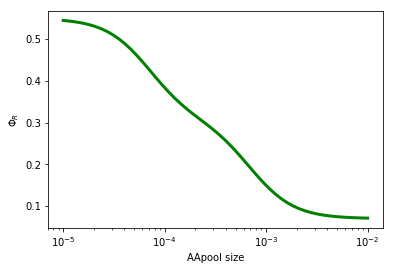

In [7]:
plt.plot(astar,phiR,'g',lw=3)
plt.xscale('log')
plt.xlabel('AApool size')
plt.ylabel('$\Phi_R$')
plt.show()

and that for growth rate is expressed as 

$\lambda = (\Phi_R^{max}-\Phi_R^0)\frac{\gamma \nu}{\gamma+\nu}$

In [8]:
growth_rate=(phiRmax-phiR0)*(nu*gamma/(nu+gamma))

We can now plot the trends to study the variation of growth rate with ribosomal fraction across the entire range of amino acid concentrations

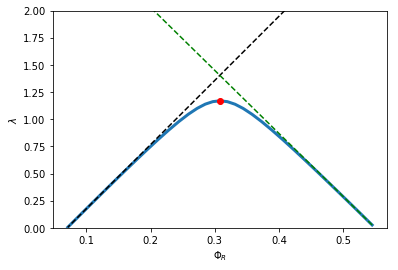

In [9]:
plt.plot()
max_gr=max(growth_rate)
i=0
while growth_rate[i]!=max_gr:
    i=i+1
plt.plot(phiR,growth_rate,lw=3)
plt.plot(phiR,gamma0*(phiR-phiR0),'k--')
plt.plot(phiR,nu0*(phiRmax-phiR),'g--')
plt.plot(phiR[i],max_gr,'ro')

plt.ylim([0,2.0])
plt.xlabel('$\Phi_R$')
plt.ylabel('$\lambda$')
plt.show()

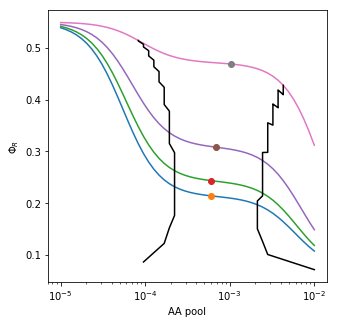

In [35]:
def RibFracGen(nu0):
    astar=np.logspace(-5,-2)
    Kt=1e-4
    gamma0=5.9
    gamma=gamma0*((astar/Kt)**2)/(1+(astar/Kt)**2)
    Kn=50e-4 # 50 times Kt
    nu=nu0*(1/(1+(astar/Kn)**2))
    phiRmax=0.55
    phiR0=0.07
    phiR=(phiRmax-phiR0)*(nu/(nu+gamma))+phiR0
    growth_rate=(phiRmax-phiR0)*(nu*gamma/(nu+gamma))
    max_gr=max(growth_rate)
    i=0
    while growth_rate[i]!=max_gr:
        i=i+1
    max_astar=astar[i]
    max_phiR=phiR[i]
    return (astar,phiR,max_astar,max_phiR)
    
nuvals=[2.5,3.3,5.8,30.0]
for n in nuvals:
    A,R,mA,mR=RibFracGen(n)
    plt.plot(A,R)
    plt.plot(mA,mR,'o')

nuvals=np.linspace(0.1,30.0,70)
Al=[]
Rl=[]
Au=[]
Ru=[]
for n in nuvals:
    A,R,mA,mR=RibFracGen(n)
    i=0
    At=[]
    Rt=[]
    for i in range(0,len(R)):
        if R[i]>0.9*mR and R[i]<1.1*mR:
            At.append(A[i]) 
            Rt.append(R[i])
    Al.append(min(At))
    Rl.append(max(Rt))
    Au.append(max(At))
    Ru.append(min(Rt))
plt.plot(Al,Rl,'k')
plt.plot(Au,Ru,'k')

plt.xlabel('AA pool')
plt.ylabel('$\Phi_R$')
plt.xscale('log')

Note that to produce the above plot, the value of Kn is 50 times Kt. This results in a flatter plateau. Can't seem to reproduce the grey region depcited in Fig 3C